In [1]:
import numpy as np
import xarray as xr
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large',
})
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

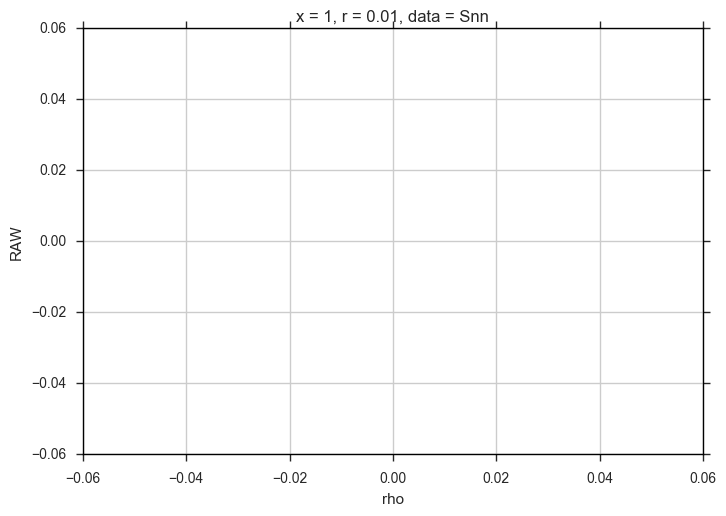

In [3]:
prefix = 'two_comp_temp_eps-1.00-0.95'
raw_data = xr.open_dataset('../data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')

thermo = xr.open_dataset('../data/{}thermo_data.nc'.format(prefix))['THERMO']
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)


mesh = raw_data.sel(data='Snn', r=raw_data.coords['r'][0]).plot()

# mesh.axes.set_ylabel(r'$\rho$')
# mesh.axes.set_title('')
# mesh.colorbar.set_label(r'S$_{nn}$(k=0)')

In [5]:
raw_data.sel(x=1, data='Snn')

<xarray.DataArray 'RAW' (rho: 16, r: 4095)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
    x        int32 1
  * r        (r) float64 0.01 0.02 0.03 0.03999 0.04999 0.05999 0.06999 ...
    data     <U8 'Snn'
  * rho      (rho) float64 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 ...

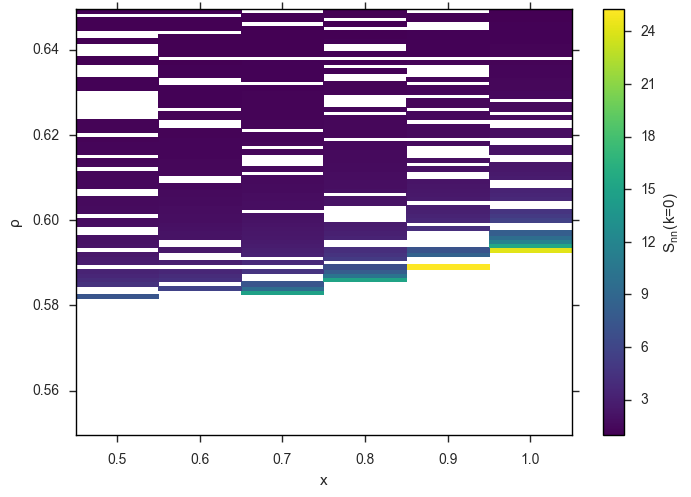

In [2]:
prefix = 'two_comp_eps-1.00-0.95'
raw_data = xr.open_dataset('../data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')

thermo = xr.open_dataset('../data/{}thermo_data.nc'.format(prefix))['THERMO']
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)


mesh = raw_data.sel(data='Snn', r=raw_data.coords['r'][0]).plot()

mesh.axes.set_ylabel(r'$\rho$')
mesh.axes.set_title('')
mesh.colorbar.set_label(r'S$_{nn}$(k=0)')

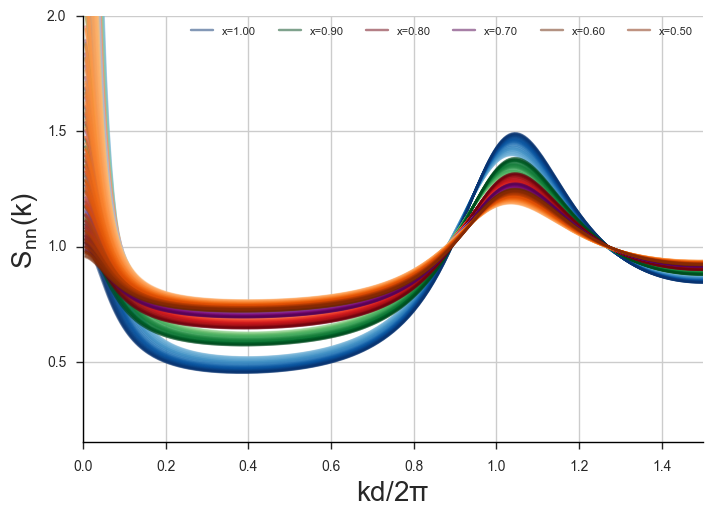

In [3]:
rhos = [x.item() for x in raw_data.coords['rho']]
xs = [x.item() for x in raw_data.coords['x']]
# xs = [1]

fig, ax = plt.subplots()
# ax.set_color_cycle(plt.cm.viridis(len(xs)))
cmaps = ['Blues', 'Greens', 'Reds', 'BuPu', 'YlOrBr', 'Oranges']

data = 'Snn'
ax.set_ylabel('$S_{nn}(k)$', fontsize=20)
for x, cmap in zip(xs, it.cycle(cmaps)):
    colors = sns.color_palette(cmap, len(rhos))
    for rho_idx, rho in enumerate(rhos):
        label = 'x={:.2f}'.format(x) if rho_idx==len(rhos)-1 else '_nolegend_'
        s_k = raw_data.sel(x=x, rho=rho, data=data)
        ax.plot(k/(2*np.pi), s_k,
                color=colors[rho_idx],
                alpha=0.5,
                label=label)
    
plt.legend(ncol=len(xs), fontsize=8)
plt.ylim(0.15, 2)
plt.xlim(0, 1.5)


ax.set_xlabel(r'$kd/2\pi$', fontsize=20)
# ax.set_xticklabels(k)
sns.despine()
# fig.savefig('{}_two_comp_lj.pdf'.format(data, x, rho), bbox_inches='tight')

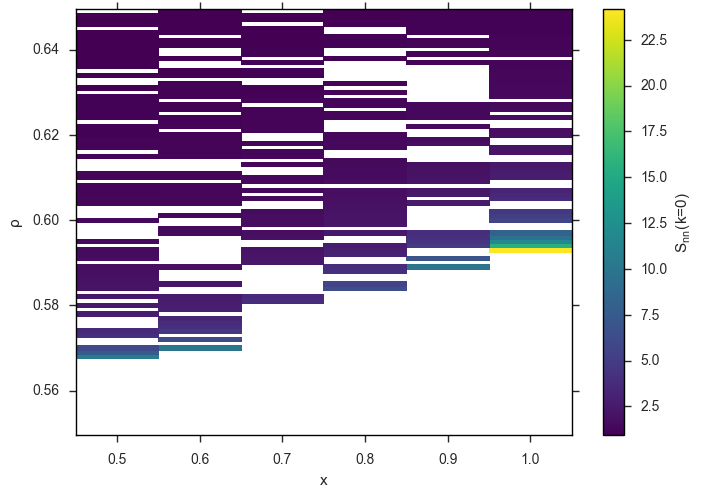

In [4]:
prefix = 'two_comp_eps-1.00-0.90'
raw_data = xr.open_dataset('../data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')

thermo = xr.open_dataset('../data/{}thermo_data.nc'.format(prefix))['THERMO']
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)


mesh = raw_data.sel(data='Snn', r=raw_data.coords['r'][0]).plot()

mesh.axes.set_ylabel(r'$\rho$')
mesh.axes.set_title('')
mesh.colorbar.set_label(r'S$_{nn}$(k=0)')

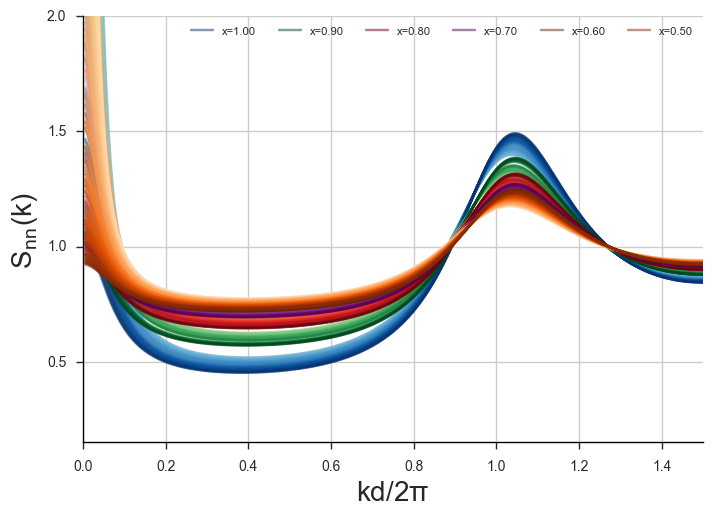

In [5]:
rhos = [x.item() for x in raw_data.coords['rho']]
xs = [x.item() for x in raw_data.coords['x']]
# xs = [1]

fig, ax = plt.subplots()
# ax.set_color_cycle(plt.cm.viridis(len(xs)))
cmaps = ['Blues', 'Greens', 'Reds', 'BuPu', 'YlOrBr', 'Oranges']

data = 'Snn'
ax.set_ylabel('$S_{nn}(k)$', fontsize=20)
for x, cmap in zip(xs, it.cycle(cmaps)):
    colors = sns.color_palette(cmap, len(rhos))
    for rho_idx, rho in enumerate(rhos):
        label = 'x={:.2f}'.format(x) if rho_idx==len(rhos)-1 else '_nolegend_'
        s_k = raw_data.sel(x=x, rho=rho, data=data)
        ax.plot(k/(2*np.pi), s_k,
                color=colors[rho_idx],
                alpha=0.5,
                label=label)
    
plt.legend(ncol=len(xs), fontsize=8)
plt.ylim(0.15, 2)
plt.xlim(0, 1.5)


ax.set_xlabel(r'$kd/2\pi$', fontsize=20)
# ax.set_xticklabels(k)
sns.despine()
# fig.savefig('{}_two_comp_lj.pdf'.format(data, x, rho), bbox_inches='tight')

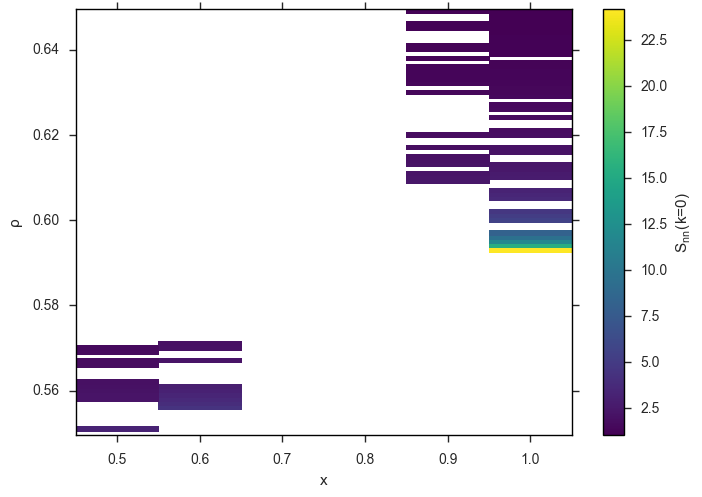

In [6]:
prefix = 'two_comp_eps-1.00-0.80'
raw_data = xr.open_dataset('../data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')

thermo = xr.open_dataset('../data/{}thermo_data.nc'.format(prefix))['THERMO']
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)


mesh = raw_data.sel(data='Snn', r=raw_data.coords['r'][0]).plot()

mesh.axes.set_ylabel(r'$\rho$')
mesh.axes.set_title('')
mesh.colorbar.set_label(r'S$_{nn}$(k=0)')

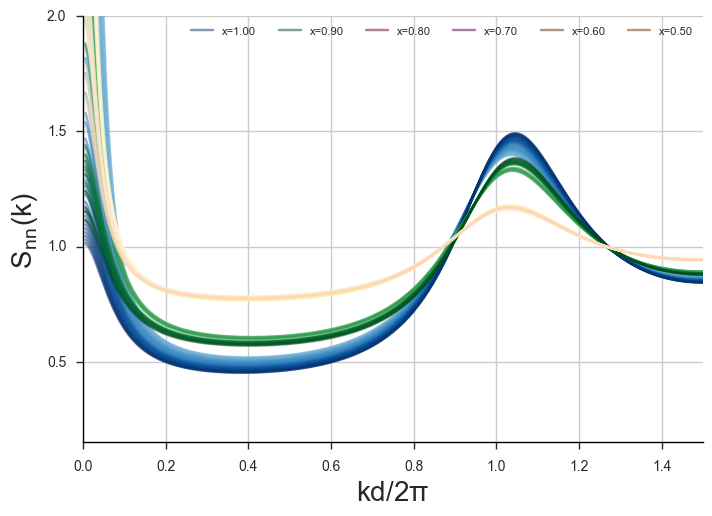

In [7]:
rhos = [x.item() for x in raw_data.coords['rho']]
xs = [x.item() for x in raw_data.coords['x']]
# xs = [1]

fig, ax = plt.subplots()
# ax.set_color_cycle(plt.cm.viridis(len(xs)))
cmaps = ['Blues', 'Greens', 'Reds', 'BuPu', 'YlOrBr', 'Oranges']

data = 'Snn'
ax.set_ylabel('$S_{nn}(k)$', fontsize=20)
for x, cmap in zip(xs, it.cycle(cmaps)):
    colors = sns.color_palette(cmap, len(rhos))
    for rho_idx, rho in enumerate(rhos):
        label = 'x={:.2f}'.format(x) if rho_idx==len(rhos)-1 else '_nolegend_'
        s_k = raw_data.sel(x=x, rho=rho, data=data)
        ax.plot(k/(2*np.pi), s_k,
                color=colors[rho_idx],
                alpha=0.5,
                label=label)
    
plt.legend(ncol=len(xs), fontsize=8)
plt.ylim(0.15, 2)
plt.xlim(0, 1.5)


ax.set_xlabel(r'$kd/2\pi$', fontsize=20)
# ax.set_xticklabels(k)
sns.despine()
# fig.savefig('{}_two_comp_lj.pdf'.format(data, x, rho), bbox_inches='tight')

In [ ]:
rhos = [x.item() for x in raw_data.coords['rho']]
xs = [x.item() for x in raw_data.coords['x']]
xs = [0.5]

fig, ax = plt.subplots()
# ax.set_color_cycle(plt.cm.viridis(len(xs)))
cmaps = ['Blues', 'Greens', 'Reds']

ax.set_ylabel('$S_{nc}(k)$', fontsize=20)
for data in ['S_k_00', 'S_k_01', 'S_k_11']:
    
    for x, cmap in zip(xs, cmaps):
        colors = sns.color_palette(cmap, len(rhos))
        for rho_idx, rho in enumerate(rhos):
            s_k = raw_data.sel(x=x, rho=rho, data=data)
            ax.plot(k/(2*np.pi), s_k,
                     color=colors[rho_idx],
                     label='x={:.2f} rho={:.2f}'.format(x, rho))
    
# plt.legend(ncol=len(xs), fontsize=8)
# plt.ylim(0, 3)
plt.xlim(0, 4)


ax.set_xlabel(r'$kd/2\pi$', fontsize=20)
# ax.set_xticklabels(k)
sns.despine()
# fig.savefig('{}_two_comp_lj.pdf'.format(data, x, rho), bbox_inches='tight')

In [ ]:
rhos = [x.item() for x in raw_data.coords['rho']]
xs = [x.item() for x in raw_data.coords['x']]
xs = [1.0]

fig, ax = plt.subplots()
# ax.set_color_cycle(plt.cm.viridis(len(xs)))
cmaps = ['Blues', 'Greens', 'Reds']

ax.set_ylabel('$S_{xx}(k)$', fontsize=20)
for n, data in enumerate(['Snn', 'Snc', 'Scc']):
    
    for x, cmap in zip(xs, cmaps):
#         colors = sns.color_palette(cmap, len(rhos))
        colors = sns.color_palette(cmaps[n], len(rhos))
        for rho_idx, rho in enumerate(rhos):
            s_k = raw_data.sel(x=x, rho=rho, data=data)
            ax.plot(k/(2*np.pi), s_k,
                     color=colors[rho_idx],
                     label=data if rho==0.69 else '_nolegend_')
    
plt.legend(ncol=len(xs), fontsize=8)
# plt.ylim(0, 3)
plt.xlim(0, 4)
plt.title('x = {}'.format(x))


ax.set_xlabel(r'$kd/2\pi$', fontsize=20)
# ax.set_xticklabels(k)
sns.despine()
fig.savefig('x{:.2f}_two_comp_lj.pdf'.format(x), bbox_inches='tight')